In [1]:
import gc
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix, hstack
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
df = pd.read_csv('/content/drive/MyDrive/minor project/train.tsv', sep = '\t')

In [5]:
item_name = df.loc[df['name'] == 'Razer BlackWidow Chroma Keyboard', 'category_name'].values[0]
print(item_name)

Electronics/Computers & Tablets/Components & Parts


In [6]:
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [7]:
df[df.isnull().any(axis=1)].count()

train_id             635553
name                 635553
item_condition_id    635553
category_name        629226
brand_name             2871
price                635553
shipping             635553
item_description     635549
dtype: int64

In [8]:
df.shape

(1482535, 8)

In [9]:
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [10]:
df1=df.dropna()
df1.shape

(846982, 8)

In [11]:
df1[df1.isnull().any(axis=1)].count()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
dtype: int64

In [12]:
df1.head(10)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.
10,10,Smashbox primer,2,Beauty/Makeup/Face,Smashbox,8.0,1,0.25 oz Full size is 1oz for [rm] in Sephora
11,11,New vs pi k body mists,1,Beauty/Fragrance/Women,Victoria's Secret,34.0,0,(5) new vs pink body mists (2.5 oz each) Fresh...
12,12,Black Skater dress,2,"Women/Dresses/Above Knee, Mini",rue,16.0,0,"Xl, great condition"
13,13,Sharpener and eraser,1,Other/Office supplies/School Supplies,Scholastic,4.0,1,No description yet
14,14,HOLD for Dogs2016 Minnetonka boots,3,Women/Shoes/Boots,UGG Australia,43.0,0,Authentic. Suede fringe boots. Great condition...


In [13]:
df2=df1
df2['price'] = df2['price'] * 10

<ipython-input-13-bf984507f8c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price'] = df2['price'] * 10


In [14]:
df2.head(10)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,520.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,100.0,1,Adorable top with a hint of lace and a key hol...
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,640.0,0,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,60.0,1,You get three pairs of Sophie cheer shorts siz...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,190.0,0,Girls Size small Plus green. Three shorts total.
10,10,Smashbox primer,2,Beauty/Makeup/Face,Smashbox,80.0,1,0.25 oz Full size is 1oz for [rm] in Sephora
11,11,New vs pi k body mists,1,Beauty/Fragrance/Women,Victoria's Secret,340.0,0,(5) new vs pink body mists (2.5 oz each) Fresh...
12,12,Black Skater dress,2,"Women/Dresses/Above Knee, Mini",rue,160.0,0,"Xl, great condition"
13,13,Sharpener and eraser,1,Other/Office supplies/School Supplies,Scholastic,40.0,1,No description yet
14,14,HOLD for Dogs2016 Minnetonka boots,3,Women/Shoes/Boots,UGG Australia,430.0,0,Authentic. Suede fringe boots. Great condition...


In [15]:
df3=df2
df3['shipping'] = np.where(df3['price'] >=350, 1, 0)

<ipython-input-15-4e0e117e418d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['shipping'] = np.where(df3['price'] >=350, 1, 0)


In [16]:
df3.head(10)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,520.0,1,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,100.0,0,Adorable top with a hint of lace and a key hol...
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,640.0,1,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,60.0,0,You get three pairs of Sophie cheer shorts siz...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,190.0,0,Girls Size small Plus green. Three shorts total.
10,10,Smashbox primer,2,Beauty/Makeup/Face,Smashbox,80.0,0,0.25 oz Full size is 1oz for [rm] in Sephora
11,11,New vs pi k body mists,1,Beauty/Fragrance/Women,Victoria's Secret,340.0,0,(5) new vs pink body mists (2.5 oz each) Fresh...
12,12,Black Skater dress,2,"Women/Dresses/Above Knee, Mini",rue,160.0,0,"Xl, great condition"
13,13,Sharpener and eraser,1,Other/Office supplies/School Supplies,Scholastic,40.0,0,No description yet
14,14,HOLD for Dogs2016 Minnetonka boots,3,Women/Shoes/Boots,UGG Australia,430.0,1,Authentic. Suede fringe boots. Great condition...


In [17]:
df3.to_csv('/content/drive/MyDrive/minor project/final_train.tsv', sep='\t', index=False)

In [18]:
df4 = pd.read_csv('/content/drive/MyDrive/minor project/final_train.tsv', sep = '\t')

In [19]:
df4.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,520.0,1,This keyboard is in great condition and works ...
1,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,100.0,0,Adorable top with a hint of lace and a key hol...
2,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,640.0,1,Size small but straps slightly shortened to fi...
3,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,60.0,0,You get three pairs of Sophie cheer shorts siz...
4,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,190.0,0,Girls Size small Plus green. Three shorts total.


a higher value in the item condition ID represents a better or newer condition of the product 

In [20]:
unique_names = df4['item_condition_id'].unique()
unique_names

array([3, 1, 2, 4, 5])

creates a boolean mask called msk. This mask is a way to randomly split a DataFrame df into a training set(80% of the rows)  and a testing set(20% of the rows)  for a machine learning model.

item_condition_id

In [21]:
msk = np.random.rand(len(df4)) < 0.8
train = df4[msk]
test = df4[~msk]

In [22]:
train.shape, test.shape

((677791, 8), (169191, 8))

In [23]:
train.head(20)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,520.0,1,This keyboard is in great condition and works ...
1,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,100.0,0,Adorable top with a hint of lace and a key hol...
2,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,640.0,1,Size small but straps slightly shortened to fi...
3,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,60.0,0,You get three pairs of Sophie cheer shorts siz...
4,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,190.0,0,Girls Size small Plus green. Three shorts total.
5,10,Smashbox primer,2,Beauty/Makeup/Face,Smashbox,80.0,0,0.25 oz Full size is 1oz for [rm] in Sephora
7,12,Black Skater dress,2,"Women/Dresses/Above Knee, Mini",rue,160.0,0,"Xl, great condition"
8,13,Sharpener and eraser,1,Other/Office supplies/School Supplies,Scholastic,40.0,0,No description yet
9,14,HOLD for Dogs2016 Minnetonka boots,3,Women/Shoes/Boots,UGG Australia,430.0,1,Authentic. Suede fringe boots. Great condition...
10,15,Sephora tarte birthday gift,1,Beauty/Makeup/Makeup Sets,Tarte,110.0,0,Brand new. Deluxe travel size products. Contai...


In [24]:
train.head(1)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,520.0,1,This keyboard is in great condition and works ...


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677791 entries, 0 to 846981
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   train_id           677791 non-null  int64  
 1   name               677791 non-null  object 
 2   item_condition_id  677791 non-null  int64  
 3   category_name      677791 non-null  object 
 4   brand_name         677791 non-null  object 
 5   price              677791 non-null  float64
 6   shipping           677791 non-null  int64  
 7   item_description   677791 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 46.5+ MB


In [26]:
train.price.describe()

count    677791.000000
mean        308.995288
std         444.960619
min           0.000000
25%         120.000000
50%         200.000000
75%         340.000000
max       20090.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Price Distribution')

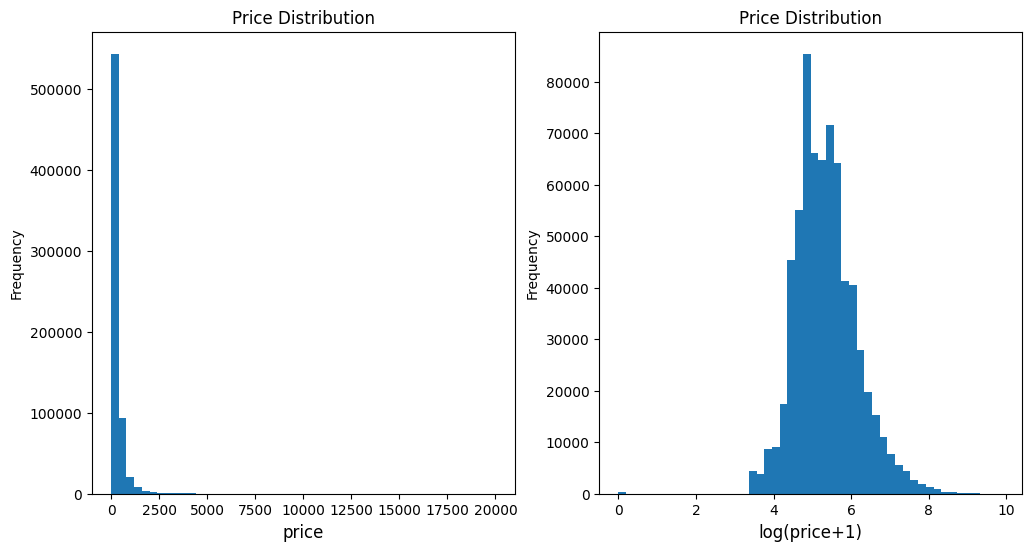

In [27]:
plt.subplot(1, 2, 1)
(train['price']).plot.hist(bins=50, figsize=(12, 6), range = [0, 20000])
plt.xlabel('price', fontsize=12)
plt.title('Price Distribution', fontsize=12)

plt.subplot(1, 2, 2)
np.log(train['price']+1).plot.hist(bins=50, figsize=(12,6))
plt.xlabel('log(price+1)', fontsize=12)
plt.title('Price Distribution', fontsize=12)

In [28]:
train['shipping'].value_counts() / len(train)

0    0.758936
1    0.241064
Name: shipping, dtype: float64

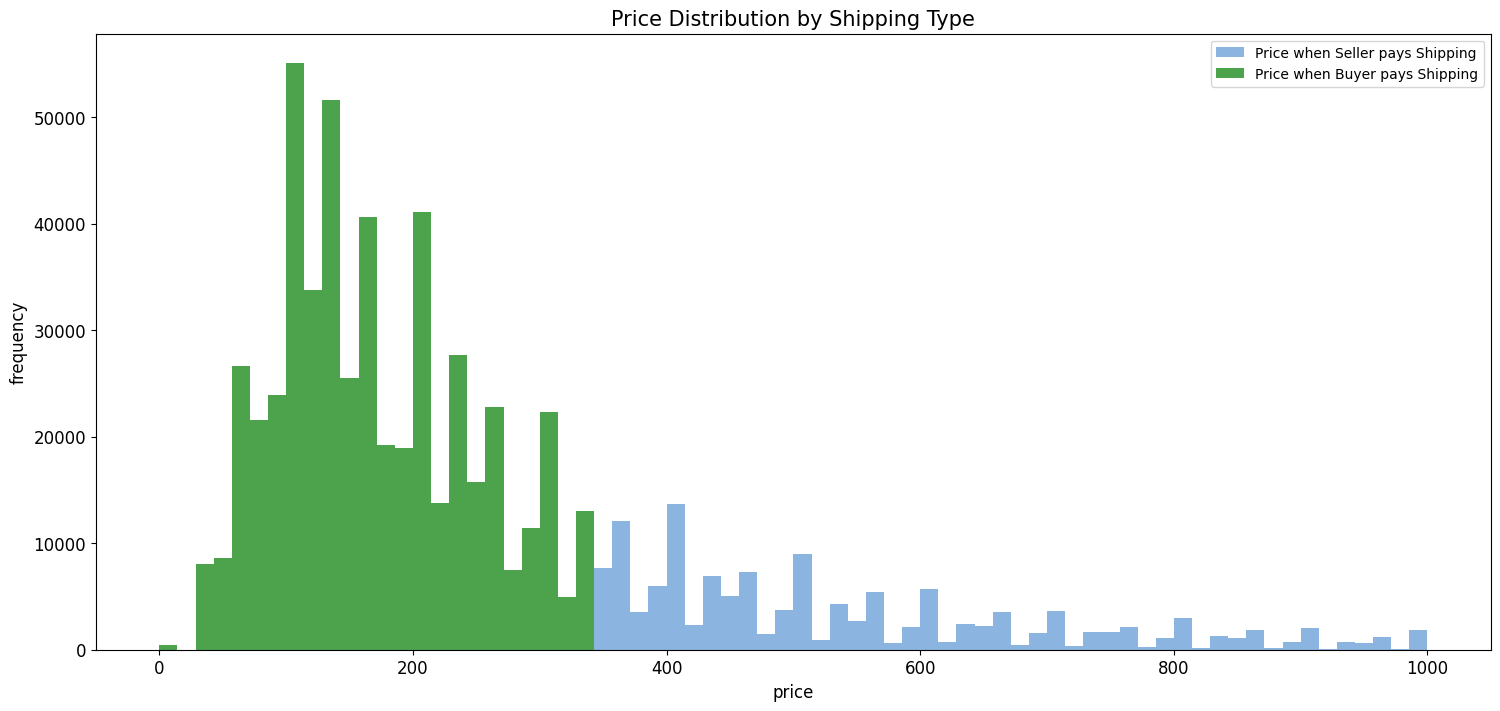

In [29]:
shipping_fee_by_buyer = train.loc[df4['shipping'] == 0, 'price']
shipping_fee_by_seller = train.loc[df4['shipping'] == 1, 'price']

fig, ax = plt.subplots(figsize=(18,8))
ax.hist(shipping_fee_by_seller, color='#8CB4E1', alpha=1.0, bins=70, range = [0, 1000],
       label='Price when Seller pays Shipping')
ax.hist(shipping_fee_by_buyer, color='#007D00', alpha=0.7, bins=70, range = [0, 1000],
       label='Price when Buyer pays Shipping')
plt.xlabel('price', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.title('Price Distribution by Shipping Type', fontsize=15)
plt.tick_params(labelsize=12)
plt.legend()
plt.show()

In [30]:
print('The average price is {}'.format(round(shipping_fee_by_seller.mean(), 2)), 'if seller pays shipping');
print('The average price is {}'.format(round(shipping_fee_by_buyer.mean(), 2)), 'if buyer pays shipping')

The average price is 750.91 if seller pays shipping
The average price is 168.63 if buyer pays shipping


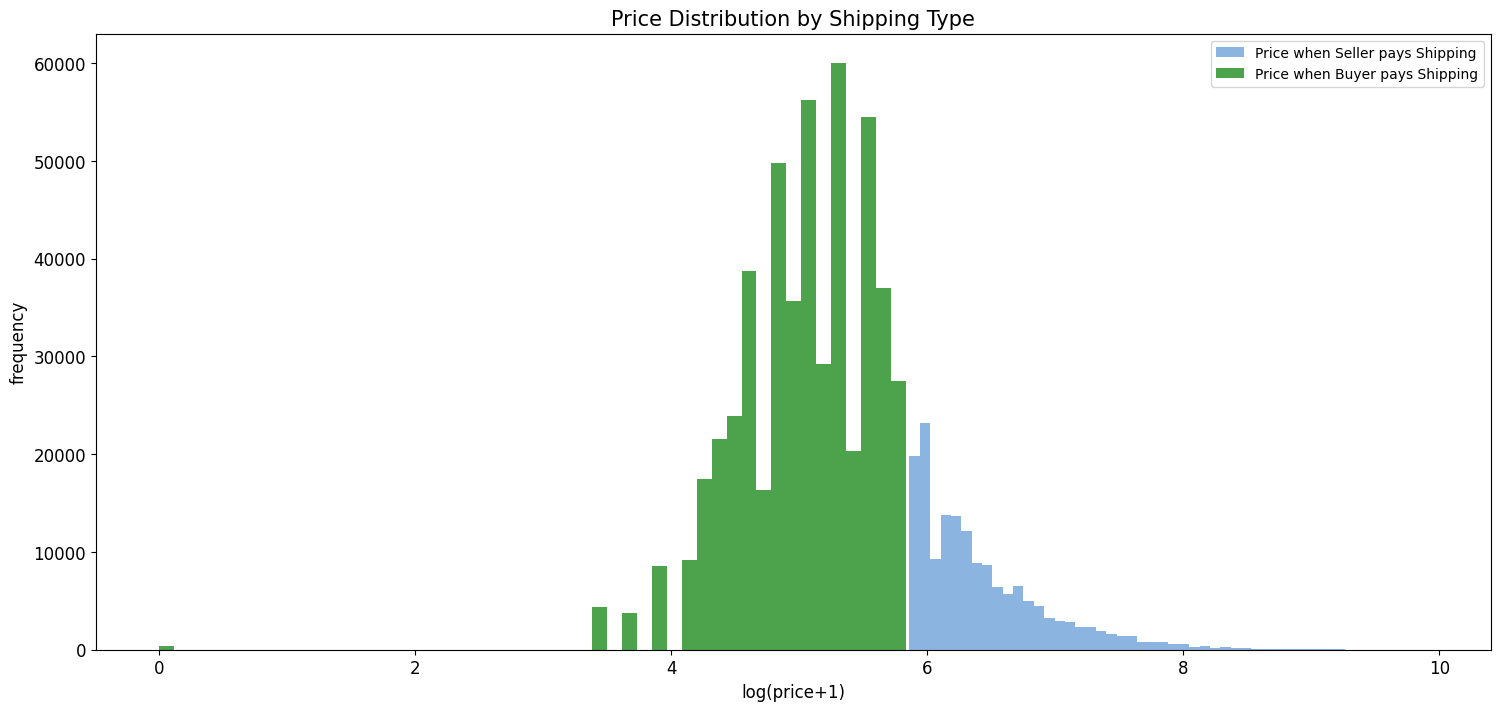

In [31]:
fig, ax = plt.subplots(figsize=(18,8))
ax.hist(np.log(shipping_fee_by_seller+1), color='#8CB4E1', alpha=1.0, bins=50,
       label='Price when Seller pays Shipping')
ax.hist(np.log(shipping_fee_by_buyer+1), color='#007D00', alpha=0.7, bins=50,
       label='Price when Buyer pays Shipping')
plt.xlabel('log(price+1)', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.title('Price Distribution by Shipping Type', fontsize=15)
plt.tick_params(labelsize=12)
plt.legend()
plt.show()

In [32]:
print('There are', train['category_name'].nunique(), 'unique values in category name column')

There are 890 unique values in category name column


In [33]:
train['category_name'].value_counts()[:10]

Women/Athletic Apparel/Pants, Tights, Leggings    29154
Women/Tops & Blouses/T-Shirts                     26158
Beauty/Makeup/Face                                19846
Electronics/Video Games & Consoles/Games          15967
Beauty/Makeup/Lips                                15208
Women/Athletic Apparel/Shorts                     13428
Women/Underwear/Bras                              12840
Women/Tops & Blouses/Tank, Cami                   11666
Beauty/Makeup/Eyes                                11054
Men/Shoes/Athletic                                10792
Name: category_name, dtype: int64

This line of code creates a box plot using the Seaborn library in Python, which shows the relationship between the item condition ID and the price of products in a dataset. Here's what each parameter in the code does:

<Axes: xlabel='item_condition_id', ylabel='price'>

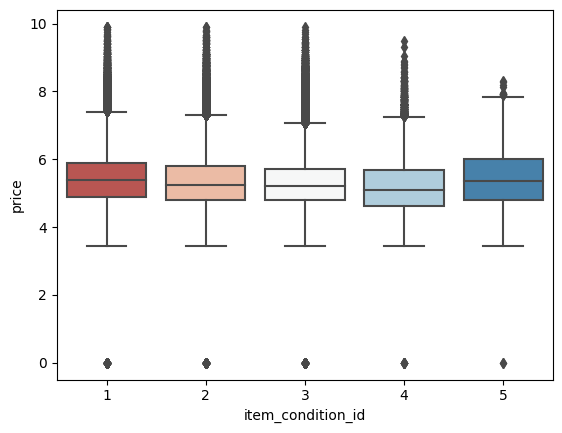

In [34]:
sns.boxplot(x = 'item_condition_id', y = np.log(train['price']+1), data = train, palette = sns.color_palette('RdBu',5))

In [35]:
NUM_BRANDS = 4000
NUM_CATEGORIES = 1000
NAME_MIN_DF = 10
MAX_FEATURES_ITEM_DESCRIPTION = 50000

In [36]:
def cutting(dataset):
    pop_brand = dataset['brand_name'].value_counts().loc[lambda x: x.index != 'missing'].index[:NUM_BRANDS]
    dataset.loc[~dataset['brand_name'].isin(pop_brand), 'brand_name'] = 'missing'
    pop_category = dataset['category_name'].value_counts().loc[lambda x: x.index != 'missing'].index[:NUM_CATEGORIES]

In [37]:
def to_categorical(dataset):
    dataset['category_name'] = dataset['category_name'].astype('category')
    dataset['brand_name'] = dataset['brand_name'].astype('category')
    dataset['item_condition_id'] = dataset['item_condition_id'].astype('category')

In [38]:
df5 = pd.read_csv('/content/drive/MyDrive/minor project/final_train.tsv', sep = '\t')
df5= df5.reset_index()
msk = np.random.rand(len(df5)) < 0.8
train = df5[msk]
test = df5[~msk]
test_new = test.drop('price', axis=1)
y_test = np.log1p(test["price"])  

In [39]:
last_row = df5.iloc[-1]
print(last_row)

index                                                          846981
train_id                                                      1482531
name                                    Little mermaid handmade dress
item_condition_id                                                   2
category_name                                Kids/Girls 2T-5T/Dresses
brand_name                                                     Disney
price                                                           140.0
shipping                                                            0
item_description     Little mermaid handmade dress never worn size 2t
Name: 846981, dtype: object


In [40]:
train = train[train.price != 0].reset_index(drop=True)

In [41]:
train.shape

(677445, 9)

In [42]:
last_row = train.iloc[-1]
print(last_row)

index                                                          846981
train_id                                                      1482531
name                                    Little mermaid handmade dress
item_condition_id                                                   2
category_name                                Kids/Girls 2T-5T/Dresses
brand_name                                                     Disney
price                                                           140.0
shipping                                                            0
item_description     Little mermaid handmade dress never worn size 2t
Name: 677444, dtype: object


In [43]:
nrow_train = train.shape[0]
y = np.log1p(train["price"])
merge: pd.DataFrame = pd.concat([train, test_new])

In [44]:
cutting(merge)
to_categorical(merge)

In [45]:
merge.head()

,index,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,520.0,1,This keyboard is in great condition and works ...
1,1,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,100.0,0,Adorable top with a hint of lace and a key hol...
2,2,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,640.0,1,Size small but straps slightly shortened to fi...
3,3,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,60.0,0,You get three pairs of Sophie cheer shorts siz...
4,4,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,190.0,0,Girls Size small Plus green. Three shorts total.


In [46]:
cv = CountVectorizer(min_df=NAME_MIN_DF)
X_name = cv.fit_transform(merge['name'])

In [47]:
cv = CountVectorizer()
X_category = cv.fit_transform(merge['category_name'])

In [48]:
tv = TfidfVectorizer(max_features=MAX_FEATURES_ITEM_DESCRIPTION, ngram_range=(1, 3), stop_words='english')
X_description = tv.fit_transform(merge['item_description'])

In [49]:
lb = LabelBinarizer(sparse_output=True)
X_brand = lb.fit_transform(merge['brand_name'])

In [50]:
X_dummies = csr_matrix(pd.get_dummies(merge[['item_condition_id', 'shipping']], sparse=True).values)

In [51]:
sparse_merge = hstack((X_dummies, X_description, X_brand, X_category, X_name)).tocsr()

In [52]:
sparse_merge.shape

(846562, 66734)

In [ ]:
mask = np.array(np.clip(sparse_merge.getnnz(axis=0) - 1, 0, 1), dtype=bool)
sparse_merge = sparse_merge[:, mask]

In [ ]:
sparse_merge.shape

(846577, 66227)

In [ ]:
X = sparse_merge[:nrow_train]
X_test = sparse_merge[nrow_train:]

In [ ]:
print(X.shape)
print(X_test.shape)

(677439, 66227)
(169138, 66227)


In [ ]:
train_X = lgb.Dataset(X, label=y)

In [ ]:
params = {
        'learning_rate': 0.75,
        'application': 'regression',
        'max_depth': 3,
        'num_leaves': 100,
        'verbosity': -1,
        'metric': 'RMSE',
    }

In [ ]:
gbm = lgb.train(params, train_set=train_X, num_boost_round=3200, verbose_eval=100)

/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


In [ ]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

In [ ]:
from sklearn.metrics import mean_squared_error
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

The rmse of prediction is: 0.46049192055488475
